# Natural Language Processing (NLP)

In this notebook, we will learn the basics of Natural Language Processing (NLP) and implement some fundamental NLP tasks using Python libraries such as NLTK, spaCy, and TensorFlow/Keras.

## 1. Import Libraries

In [3]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TONAC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TONAC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TONAC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Text Preprocessing

Text preprocessing is a crucial step in NLP. It involves cleaning and preparing text data for analysis and modeling. Common preprocessing steps include tokenization, removing stopwords, and lemmatization.

In [5]:
# Sample text
text = "Natural language processing (NLP) is a field of artificial intelligence that gives the machines the ability to read, understand and derive meaning from human languages."

# Tokenization
words = word_tokenize(text)
sentences = sent_tokenize(text)
print("Words:", words)
print("Sentences:", sentences)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered Words:", filtered_words)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Words: ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'gives', 'the', 'machines', 'the', 'ability', 'to', 'read', ',', 'understand', 'and', 'derive', 'meaning', 'from', 'human', 'languages', '.']
Sentences: ['Natural language processing (NLP) is a field of artificial intelligence that gives the machines the ability to read, understand and derive meaning from human languages.']
Filtered Words: ['Natural', 'language', 'processing', '(', 'NLP', ')', 'field', 'artificial', 'intelligence', 'gives', 'machines', 'ability', 'read', ',', 'understand', 'derive', 'meaning', 'human', 'languages', '.']
Lemmatized Words: ['Natural', 'language', 'processing', '(', 'NLP', ')', 'field', 'artificial', 'intelligence', 'give', 'machine', 'ability', 'read', ',', 'understand', 'derive', 'meaning', 'human', 'language', '.']


## 3. Feature Extraction

Feature extraction transforms text data into numerical representations that machine learning models can understand. Common techniques include Bag of Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF).

In [7]:
# Sample corpus
corpus = [
    'I love programming in Python.',
    'NLP is an interesting field of study.',
    'Machine learning and deep learning are subfields of AI.',
    'Python is great for data science.'
]

# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(corpus)
print("Bag of Words:")
print(X_bow.toarray())
print(vectorizer.get_feature_names_out())

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
print("TF-IDF:")
print(X_tfidf.toarray())
print(tfidf_vectorizer.get_feature_names_out())

Bag of Words:
[[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0]
 [1 0 1 1 0 1 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0]]
['ai' 'an' 'and' 'are' 'data' 'deep' 'field' 'for' 'great' 'in'
 'interesting' 'is' 'learning' 'love' 'machine' 'nlp' 'of' 'programming'
 'python' 'science' 'study' 'subfields']
TF-IDF:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.52547275 0.         0.
  0.         0.52547275 0.         0.         0.         0.52547275
  0.41428875 0.         0.         0.        ]
 [0.         0.40021825 0.         0.         0.         0.
  0.40021825 0.         0.         0.         0.40021825 0.31553666
  0.         0.         0.         0.40021825 0.31553666 0.
  0.         0.         0.40021825 0.        ]
 [0.3068352  0.         0.3068352  0.3068352  0.         0.3068352
  0.         0.         0.         0.         0.         0.
  0.6136704  0

## 4. Text Classification with Naive Bayes

We will use the `20newsgroups` dataset from `sklearn.datasets` to perform text classification with a Naive Bayes classifier.

In [9]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(X_train, y_train)

# Make predictions
y_pred = text_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6928191489361702
Confusion Matrix:
[[ 24   2   1 148]
 [  0 173   1  26]
 [  1   5 149  45]
 [  0   2   0 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.14      0.24       175
           1       0.95      0.86      0.91       200
           2       0.99      0.74      0.85       200
           3       0.44      0.99      0.61       177

    accuracy                           0.69       752
   macro avg       0.84      0.68      0.65       752
weighted avg       0.84      0.69      0.67       752



## 5. Text Classification with LSTM

We will use the IMDB movie reviews dataset to build a text classification model using an LSTM (Long Short-Term Memory) network.

In [11]:
# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data
def decode_review(text_ids):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_ids])

# Pad sequences
train_data = pad_sequences(train_data, maxlen=256)
test_data = pad_sequences(test_data, maxlen=256)

# Build the model
model = Sequential([
    Embedding(10000, 16, input_length=256),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_data, test_labels), verbose=1)

# Evaluate the model
results = model.evaluate(test_data, test_labels)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


C:\Users\TONAC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 733ms/step - accuracy: 0.5461 - loss: 0.6815 - val_accuracy: 0.7944 - val_loss: 0.4470
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 744ms/step - accuracy: 0.8458 - loss: 0.3610 - val_accuracy: 0.8600 - val_loss: 0.3150
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 743ms/step - accuracy: 0.9049 - loss: 0.2528 - val_accuracy: 0.8776 - val_loss: 0.2973
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 742ms/step - accuracy: 0.9270 - loss: 0.1946 - val_accuracy: 0.8776 - val_loss: 0.2968
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 747ms/step - accuracy: 0.9530 - loss: 0.1408 - val_accuracy: 0.8731 - val_loss: 0.3523
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 753ms/step - accuracy: 0.9586 - loss: 0.1223 - val_accuracy: 0.8683 - val_loss: 0.3996
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 750ms/step - accuracy: 0.9618 - loss: 0.1176 - val_accuracy: 0.8600 - val_loss: 0.4306
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 740ms/step - accuracy: 0.9721 - loss: 0.0902 - val_accuracy: 0.862

## 6. Plot Training and Validation Metrics

We will plot the training and validation accuracy and loss over epochs to visualize the performance of our LSTM model.

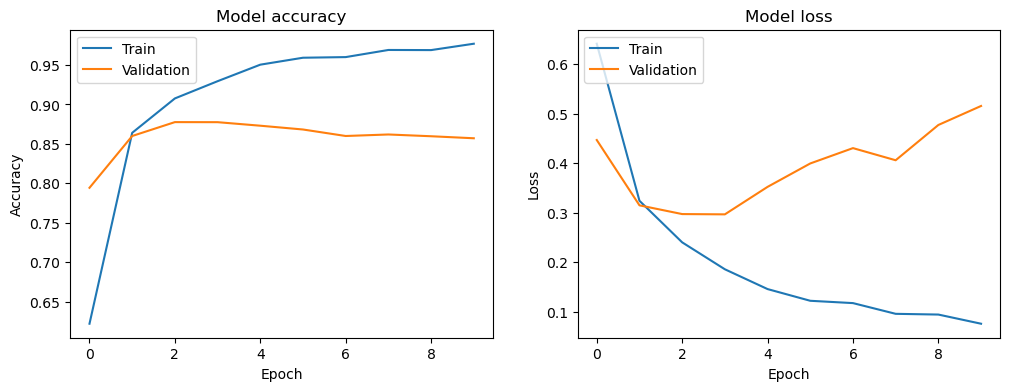

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## 7. Exercises

1. **Text Preprocessing**: Load a text dataset of your choice, perform tokenization, remove stopwords, and apply lemmatization. Print the processed text.
2. **Feature Extraction**: Using the preprocessed text from Exercise 1, create a Bag of Words (BoW) representation and a TF-IDF representation. Compare the two representations.
3. **Text Classification with Naive Bayes**: Use the `20newsgroups` dataset to build a text classification model with a Naive Bayes classifier. Evaluate the model and print the accuracy, confusion matrix, and classification report.
4. **Text Classification with LSTM**: Use the IMDB movie reviews dataset to build a text classification model using an LSTM network. Evaluate the model and plot the training and validation metrics.

### Solutions

Solutions to these exercises are provided below.

### Solution to Exercise 1: Text Preprocessing

In [16]:
# Load a text dataset
sample_text = [
    "Natural language processing is a fascinating field.",
    "It combines linguistics, computer science, and artificial intelligence.",
    "NLP enables computers to understand human language."
]

# Preprocess the text
processed_text = []
lemmatizer = WordNetLemmatizer()
for text in sample_text:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    processed_text.append(' '.join(lemmatized_words))

print("Processed Text:", processed_text)

Processed Text: ['Natural language processing fascinating field .', 'combine linguistics , computer science , artificial intelligence .', 'NLP enables computer understand human language .']


### Solution to Exercise 2: Feature Extraction

In [18]:
# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(processed_text)
print("Bag of Words:")
print(X_bow.toarray())
print(vectorizer.get_feature_names_out())

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(processed_text)
print("TF-IDF:")
print(X_tfidf.toarray())
print(tfidf_vectorizer.get_feature_names_out())

Bag of Words:
[[0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]
 [1 1 1 0 0 0 0 1 0 1 0 0 0 1 0]
 [0 0 1 1 0 0 1 0 1 0 0 1 0 0 1]]
['artificial' 'combine' 'computer' 'enables' 'fascinating' 'field' 'human'
 'intelligence' 'language' 'linguistics' 'natural' 'nlp' 'processing'
 'science' 'understand']
TF-IDF:
[[0.         0.         0.         0.         0.46735098 0.46735098
  0.         0.         0.35543247 0.         0.46735098 0.
  0.46735098 0.         0.        ]
 [0.42339448 0.42339448 0.32200242 0.         0.         0.
  0.         0.42339448 0.         0.42339448 0.         0.
  0.         0.42339448 0.        ]
 [0.         0.         0.3349067  0.44036207 0.         0.
  0.44036207 0.         0.3349067  0.         0.         0.44036207
  0.         0.         0.44036207]]
['artificial' 'combine' 'computer' 'enables' 'fascinating' 'field' 'human'
 'intelligence' 'language' 'linguistics' 'natural' 'nlp' 'processing'
 'science' 'understand']


### Solution to Exercise 3: Text Classification with Naive Bayes

In [20]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(X_train, y_train)

# Make predictions
y_pred = text_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6928191489361702
Confusion Matrix:
[[ 24   2   1 148]
 [  0 173   1  26]
 [  1   5 149  45]
 [  0   2   0 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.14      0.24       175
           1       0.95      0.86      0.91       200
           2       0.99      0.74      0.85       200
           3       0.44      0.99      0.61       177

    accuracy                           0.69       752
   macro avg       0.84      0.68      0.65       752
weighted avg       0.84      0.69      0.67       752



### Solution to Exercise 4: Text Classification with LSTM

Epoch 1/10


C:\Users\TONAC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 683ms/step - accuracy: 0.5501 - loss: 0.6914 - val_accuracy: 0.6668 - val_loss: 0.6515
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 691ms/step - accuracy: 0.7390 - loss: 0.5796 - val_accuracy: 0.8466 - val_loss: 0.3686
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 682ms/step - accuracy: 0.8741 - loss: 0.3060 - val_accuracy: 0.8658 - val_loss: 0.3144
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 680ms/step - accuracy: 0.9163 - loss: 0.2213 - val_accuracy: 0.8739 - val_loss: 0.3001
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 687ms/step - accuracy: 0.9372 - loss: 0.1742 - val_accuracy: 0.8731 - val_loss: 0.3174
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 679ms/step - accuracy: 0.9537 - loss: 0.1392 - val_accuracy: 0.8695 - val_loss: 0.3350
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 676ms/step - accuracy: 0.9604 - loss: 0.1206 - val_accuracy: 0.8660 - val_loss: 0.4124
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 683ms/step - accuracy: 0.9668 - loss: 0.1049 - val_accuracy: 0.865

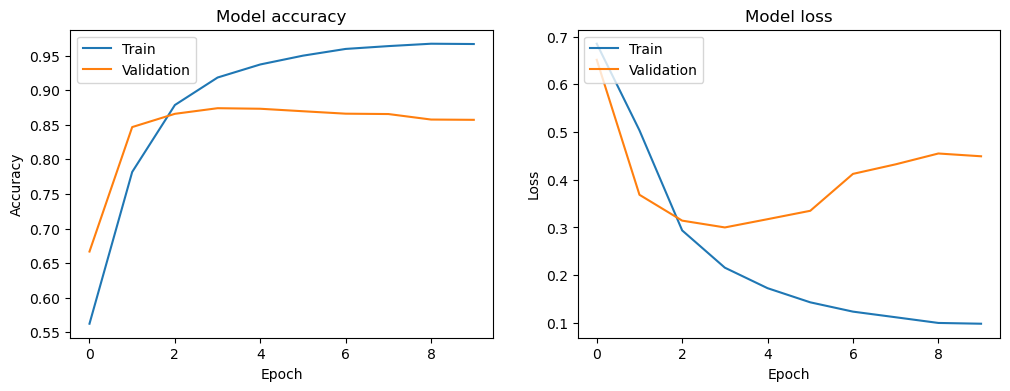

In [22]:
# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Pad sequences
train_data = pad_sequences(train_data, maxlen=256)
test_data = pad_sequences(test_data, maxlen=256)

# Build the model
model = Sequential([
    Embedding(10000, 16, input_length=256),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_data, test_labels), verbose=1)

# Evaluate the model
results = model.evaluate(test_data, test_labels)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()